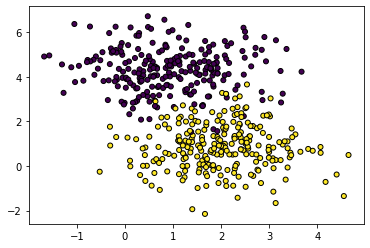

In [1]:
#Put everything into a class called LogisticRegression. The training method should be "minibatch".
#Perform a classification on the data given above.
#Plot training losses as number of iters increases.
#Write a class called classification_report containing 4 functions (Accuracy, Recall, Precision, F1) and use it to evaluate your model.

from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [2]:
#Feature scaling data for faster convergwnce
scaler = StandardScaler() 
X = scaler.fit_transform(X)

In [3]:
#train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 
#Adding intercepts
intercept = np.ones((X_train.shape[0],1))
X_train = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)

In [18]:
class LogisticRegression:
    def __init__(self, alpha=0.0001, max_iter=20000, loss_old=10000):
        self.alpha = alpha
        self.max_iter = max_iter
        self.loss_old = loss_old
        
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        l_rate = 0.01
        self.losses = []
        self.iters = []
#minibatch
        batch_size = int(0.1 * X.shape[0])
        for i in range(self.max_iter):
            ix = np.random.randint(0, X.shape[0]) #<----with replacement
            batch_X = X[ix:ix+batch_size]
            batch_y = y[ix:ix+batch_size]
            loss, grad = self.gradient(batch_X, batch_y)
            if i % 500 == 0:
                print(f"Loss at iteration {i}", loss)
                self.losses.append(loss)
                self.iters.append(i)
            self.w = self.w - self.alpha * grad            

    def gradient(self, X, y):
        m = X.shape[0]
        h = self.h_theta(X)
        error = h - y
        # putting negative sign for negative log likelihood
        loss = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return loss, grad
#for prediction
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def h_theta(self, X):
        return self.sigmoid(X @ self.w)

    def predict(self, X_test):
        yhat = np.round(self.sigmoid(X_test @ self.w))
        return yhat
    
    def plot(self):
        plt.plot(self.iters , self.losses, label = "Train Losses")
        plt.title("LOSSES")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
       

Loss at iteration 0 24.26015131959808
Loss at iteration 500 15.433583432641681
Loss at iteration 1000 11.723407679963627
Loss at iteration 1500 9.84081583054068
Loss at iteration 2000 8.48654786510586
Loss at iteration 2500 9.611239220620167
Loss at iteration 3000 5.6290501103031385
Loss at iteration 3500 6.114334571202913
Loss at iteration 4000 5.4661480722338345
Loss at iteration 4500 6.430814731984921
Loss at iteration 5000 8.013541507292762
Loss at iteration 5500 4.774213775849085
Loss at iteration 6000 3.666404496070951
Loss at iteration 6500 4.654414884299963
Loss at iteration 7000 5.061572047563014
Loss at iteration 7500 7.781776235865207
Loss at iteration 8000 4.776802898606459
Loss at iteration 8500 3.228992778494698
Loss at iteration 9000 4.831817339779434
Loss at iteration 9500 7.703413529253474
Loss at iteration 10000 4.1259133214971015
Loss at iteration 10500 3.364414966108587
Loss at iteration 11000 2.6714657439514746
Loss at iteration 11500 8.050594956385448
Loss at iter

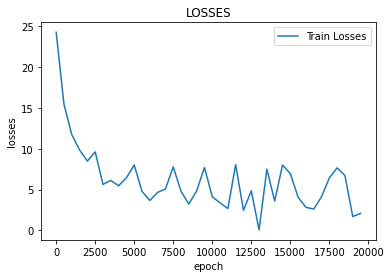

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
model.plot()

In [22]:
class classification_reports():
    def __init__(self, actual, predicted):
        self.actual = actual
        self.predicted = predicted
        self.TP = sum((self.actual == 1) & (self.predicted == 1))
        self.TN = sum((self.actual == 0) & (self.predicted == 0))
        self.FN = sum((self.actual == 1) & (self.predicted == 0))
        self.FP = sum((self.actual == 0) & (self.predicted == 1))
    def accuracy(self):
        self.acc = 100 * (self.TP + self.TN)/ float( self.TP + self.TN + self.FN + self.FP)
        return self.acc
    def recall(self):
        self.recall = (100* self.TP)/ float(self.TP + self.FN)
        return self.recall
    def precision(self):
        self.precision = 100* (self.TP)/ float(self.TP + self.FP)
        return self.precision
    def f1(self):
        self.f1 = 2 * self.precision * self.recall / (self.precision + self.recall)
        return self.f1
    def summary(self):
        print(f"Accuracy: {self.accuracy()}")
        print(f"Recall: {self.recall()}")
        print(f"Precision: {self.precision()}")
        print (f"F1: {self.f1()}")
        

In [24]:
from sklearn.metrics import classification_report
model_report = classification_reports(y_test, yhat)
model_report.summary()
print("Report: ", classification_report(y_test, yhat))

Accuracy: 97.33333333333333
Recall: 98.83720930232558
Precision: 96.5909090909091
F1: 97.70114942528734
Report:                precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.97      0.99      0.98        86

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

